In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [4]:
ret = pd.read_csv("Retail_Transactions_Dataset.csv")
print(ret.columns)

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Items',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'],
      dtype='object')


In [5]:
# missing
print(ret.isnull().sum())

Transaction_ID          0
Date                    0
Customer_Name           0
Product                 0
Total_Items             0
Total_Cost              0
Payment_Method          0
City                    0
Store_Type              0
Discount_Applied        0
Customer_Category       0
Season                  0
Promotion            9991
dtype: int64


In [6]:
ret['Promotion'].unique()
ret['Promotion'].replace('None', 'No Promotion', inplace=True)
ret['Promotion'].fillna('No Promotion', inplace=True)
print(ret['Promotion'].value_counts())
print(ret.isnull().sum())
##check
print(ret.head())

Promotion
BOGO (Buy One Get One)        10068
No Promotion                   9991
Discount on Selected Items     9941
Name: count, dtype: int64
Transaction_ID       0
Date                 0
Customer_Name        0
Product              0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
dtype: int64
   Transaction_ID                 Date     Customer_Name  \
0      1000000000  2020-12-21 19:42:52   Cheyenne Newman   
1      1000000001  2020-07-06 07:45:16  Emily Fitzgerald   
2      1000000002  2021-10-02 06:28:44      Michael Webb   
3      1000000003  2022-01-10 05:39:02      Kimberly Lin   
4      1000000004  2021-10-13 07:28:47   Cathy Hernandez   

                                             Product  Total_Items  Total_Cost  \
0                                       ['Hair Gel']            6       12.77   
1         ['Tuna', 'B

C:\Users\In The Name of Allah\AppData\Local\Temp\ipykernel_1284\1991672908.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ret['Promotion'].replace('None', 'No Promotion', inplace=True)
C:\Users\In The Name of Allah\AppData\Local\Temp\ipykernel_1284\1991672908.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [7]:
ret[['Transaction_ID','Total_Items' , 'Total_Cost']].describe().round(2)

,Transaction_ID,Total_Items,Total_Cost
count,3.000000e+04,30000.00,30000.00
mean,1.000015e+09,5.50,52.50
std,8.660400e+03,2.87,27.36
min,1.000000e+09,1.00,5.00
25%,1.000007e+09,3.00,28.69
50%,1.000015e+09,5.00,52.48
75%,1.000022e+09,8.00,76.10
max,1.000030e+09,10.00,99.99


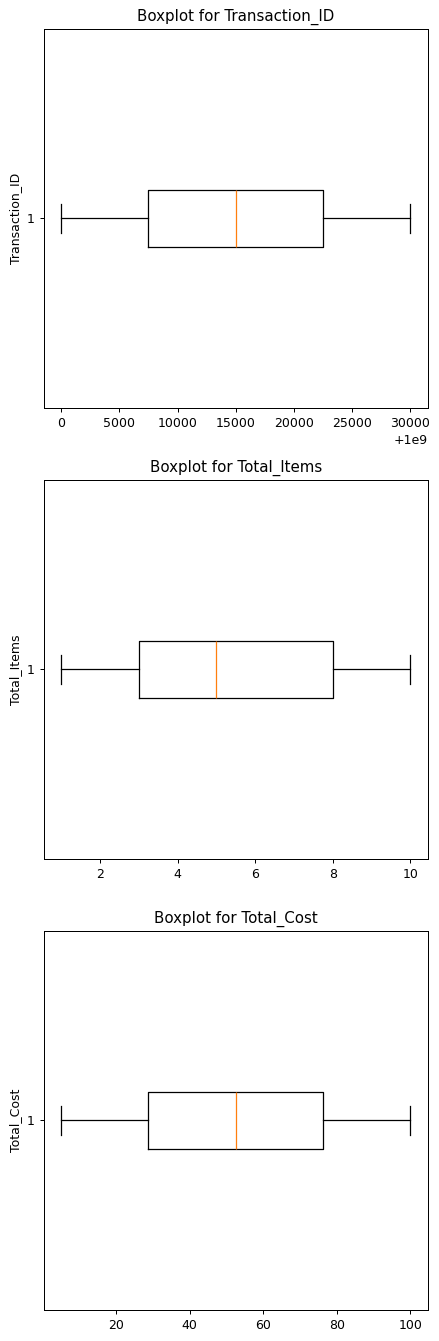

In [8]:
fig, axs = plt.subplots(3, 1, dpi=90, figsize=(5, 15))  # Adjusted to 3 rows for 3 columns

# Loop through selected columns and corresponding axes
for i, col in enumerate(['Transaction_ID', 'Total_Items', 'Total_Cost']):
    axs[i].boxplot(ret[col], vert=False)  # Boxplot for each column
    axs[i].set_title(f"Boxplot for {col}")        # Add title
    axs[i].set_ylabel(col)                        # Set Y-axis label

plt.tight_layout()  # Adjust subplot spacing for better layout
plt.show()

In [9]:
##normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = ret.select_dtypes(include=['float64', 'int64']).columns
ret[numeric_cols] = scaler.fit_transform(ret[numeric_cols])

In [10]:
# ##check data type
# ret['Date'] = pd.to_datetime(ret['Date'], errors='coerce', dayfirst=True)
# ret['Transaction_ID'] = ret['Transaction_ID'].fillna(0).astype(int)
##check object
for col in ret.select_dtypes(include=['object']).columns:
    if ret[col].apply(lambda x: str(x).isnumeric()).all():
        print(f"{col} num only.")
    else:
        print(f"{col} mixed.")


Date mixed.
Customer_Name mixed.
Product mixed.
Payment_Method mixed.
City mixed.
Store_Type mixed.
Customer_Category mixed.
Season mixed.
Promotion mixed.


In [11]:
def clean_data_types(df):
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

    string_columns = ['Customer_Name', 'Product', 'Payment_Method', 'City', 'Store_Type', 'Discount_Applied', 'Customer_Category', 'Season', 'Promotion']
    df[string_columns] = df[string_columns].astype(str).replace('nan', 'Unknown')

    numeric_columns = ['Transaction_ID', 'Total_Items', 'Total_Cost']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(df[numeric_columns].median())

    return df


In [12]:
## check
columns = [
   'Customer_Name', 'Product', 'Payment_Method',
    'City', 'Store_Type', 'Discount_Applied', 'Customer_Category',
    'Season', 'Promotion'
]
mixed_types = {col: ret[col].apply(type).unique() for col in columns}
for col, types in mixed_types.items():
    print(f"Column '{col}' has types: {types}")


Column 'Customer_Name' has types: [<class 'str'>]
Column 'Product' has types: [<class 'str'>]
Column 'Payment_Method' has types: [<class 'str'>]
Column 'City' has types: [<class 'str'>]
Column 'Store_Type' has types: [<class 'str'>]
Column 'Discount_Applied' has types: [<class 'bool'>]
Column 'Customer_Category' has types: [<class 'str'>]
Column 'Season' has types: [<class 'str'>]
Column 'Promotion' has types: [<class 'str'>]


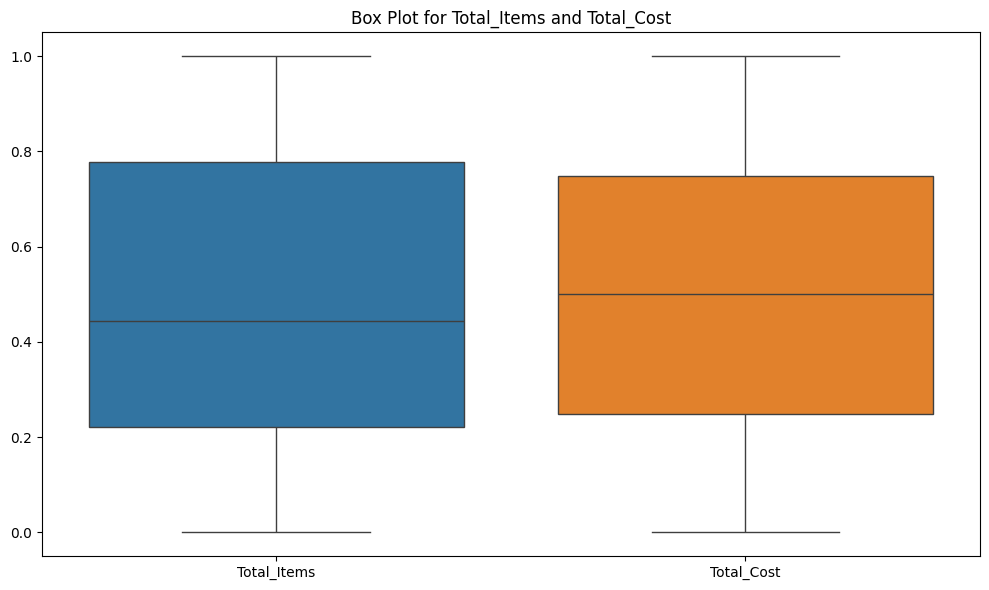

In [13]:
##Box Plot (لو الدكتور عايزه نطبقه)
columns = ['Total_Items', 'Total_Cost']
plt.figure(figsize=(10, 6))
sns.boxplot(data=ret[columns])
plt.title('Box Plot for Total_Items and Total_Cost')
plt.tight_layout()
plt.show()

<Axes: xlabel='Discount_Applied'>

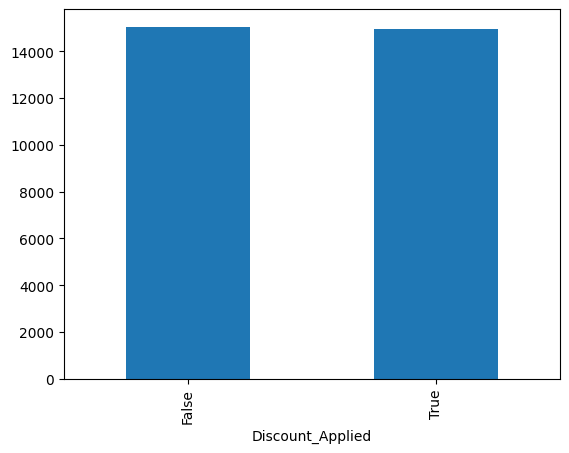

In [16]:
ret['Promotion'].value_counts().plot(kind='bar')
#ret['Discount_Applied'].value_counts().plot(kind='bar')


In [15]:
ret.to_csv("Retail_Data_Cleaned.csv", index=False)